# EXPLORATORY DATA ANALYSIS ON AN OLYMPIC DATASET.


### Initial Setup
***Importing the necessary libraries here.  These are used for dataframe management, plotting and analysis***

In [486]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

___
### Introductory Task 1 - Data Cleaning
***Time to look at the Olympic dataset I have been allotted.
First I'll read the dataset using pandas.***



In [487]:
data = pd.read_csv('39.csv')

***Now to look at part of the and discern if there are missing or null values in it.***

In [488]:
data.head(-1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,337,Mukhammad Kadyr Abdullayev,M,26.0,169.0,63.0,Uzbekistan,UZB,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Light-Welterweight,Gold
1,646,Anibl Santiago Acevedo,M,21.0,176.0,67.0,Puerto Rico,PUR,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Welterweight,Bronze
2,673,Abdel Hak Achik,M,29.0,165.0,54.0,Morocco,MAR,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Featherweight,Bronze
3,674,Mohamed Abdelhak Achik,M,27.0,174.0,57.0,Morocco,MAR,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Bantamweight,Bronze
4,723,Osmay Acosta Duarte,M,23.0,188.0,91.0,Cuba,CUB,2008 Summer,2008,Summer,Beijing,Boxing,Boxing Men's Heavyweight,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,134525,Zhang Ning,F,33.0,175.0,65.0,China,CHN,2008 Summer,2008,Summer,Beijing,Badminton,Badminton Women's Singles,Gold
1020,134597,Zhang Yawen,F,23.0,162.0,58.0,China-2,CHN,2008 Summer,2008,Summer,Beijing,Badminton,Badminton Women's Doubles,Bronze
1021,134683,Zhao Yunlei,F,25.0,173.0,60.0,China-1,CHN,2012 Summer,2012,Summer,London,Badminton,Badminton Mixed Doubles,Gold
1022,134683,Zhao Yunlei,F,25.0,173.0,60.0,China-1,CHN,2012 Summer,2012,Summer,London,Badminton,Badminton Women's Doubles,Gold


In [489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1025 non-null   int64  
 1   Name    1025 non-null   object 
 2   Sex     1025 non-null   object 
 3   Age     1021 non-null   float64
 4   Height  1020 non-null   float64
 5   Weight  1017 non-null   float64
 6   Team    1025 non-null   object 
 7   NOC     1025 non-null   object 
 8   Games   1025 non-null   object 
 9   Year    1025 non-null   int64  
 10  Season  1025 non-null   object 
 11  City    1025 non-null   object 
 12  Sport   1025 non-null   object 
 13  Event   1025 non-null   object 
 14  Medal   1025 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 120.2+ KB


**There doesn't seem to be any null values in this dataset according to the info() property.**
**That makes my task so much more easier :)** **But just for assurance, let me do it the old fashioned way...**

In [490]:
missing = (data['Height'] ==0).sum()
print(missing," missing height values")
missing = (data['Weight'] ==0).sum()
print(missing," missing weight values")


0  missing height values
0  missing weight values


***Perfect! Moving on to the next task.***

*Note: China1 and China2 might look similar, but are infact the names for PRC and Taiwan respectively from what I recall, I will not be clubbing them under one banner because democracy.*
___

### Introductory Task 2 - Visualizing the age for silver medalists
**For this, I'll just copy over the dataset and drop all the rows with gold or silver medallists.**

In [491]:
silver_winners = data.copy()
gold_winners = data[data['Medal'] == 'Gold'].index 
bronze_winners = data[data['Medal']=='Bronze'].index
silver_winners.drop(gold_winners,inplace=True)
silver_winners.drop(bronze_winners,inplace = True)
data = pd.read_csv('39.csv')

**And now I have data of exclusively the silver medallists...** 

In [492]:
silver_winners.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
8,851,Jerzy Adamski,M,23.0,171.0,58.0,Poland,POL,1960 Summer,1960,Summer,Roma,Boxing,Boxing Men's Featherweight,Silver
13,2420,Andrs Aldama Cabrera,M,20.0,183.0,63.0,Cuba,CUB,1976 Summer,1976,Summer,Montreal,Boxing,Boxing Men's Light-Welterweight,Silver
15,2599,Ion Alexe,M,26.0,189.0,81.0,Romania,ROU,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Heavyweight,Silver
20,3240,Mohamed Aly Reda,M,29.0,190.0,91.0,Egypt,EGY,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Super-Heavyweight,Silver
22,3608,An Yeong-Su,M,20.0,174.0,70.0,South Korea,KOR,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,Silver


<AxesSubplot:xlabel='Age', ylabel='Number of winners'>

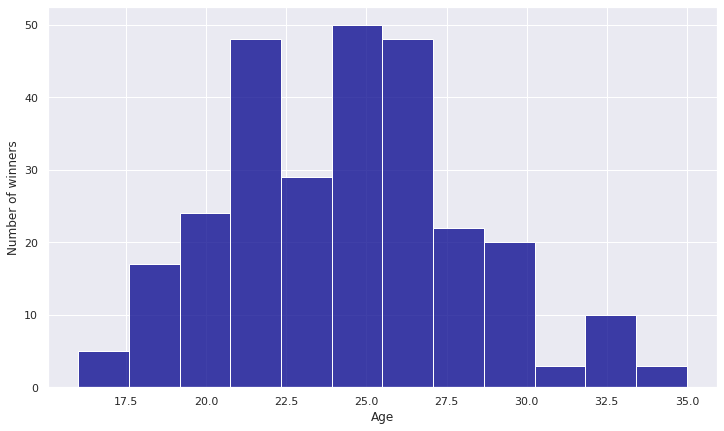

In [493]:
plt.figure(figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Number of winners")
sns.histplot(silver_winners['Age'],color="darkblue")

/home/swapnilsnair/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Proportion of winners'>

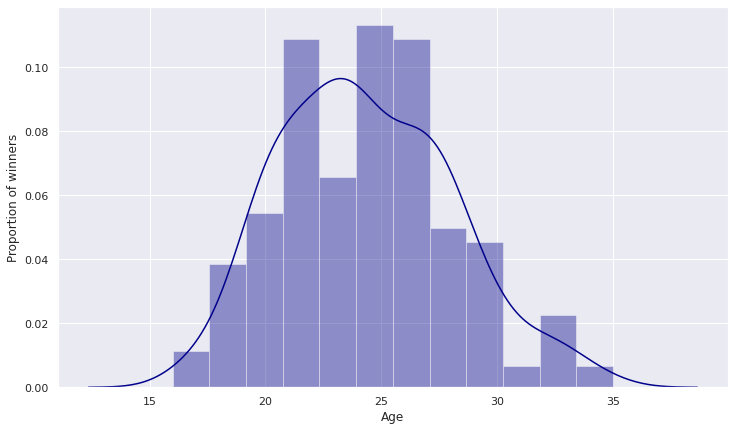

In [494]:
plt.figure(figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Proportion of winners")
sns.distplot(silver_winners['Age'],color="darkblue")

**Pretty high percentage in that 24-26 bracket I must say.**
___

### Introductory Question 3 - Create and populate a column called BMI
**Quite simple actually, I just add a new column and fill it with the corresponding weight divided by the square of the height in meters.**

In [495]:
data['BMI'] = data['Weight']/(data['Height']/100)**2

In [496]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
0,337,Mukhammad Kadyr Abdullayev,M,26.0,169.0,63.0,Uzbekistan,UZB,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Light-Welterweight,Gold,22.058051
1,646,Anibl Santiago Acevedo,M,21.0,176.0,67.0,Puerto Rico,PUR,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Welterweight,Bronze,21.629649
2,673,Abdel Hak Achik,M,29.0,165.0,54.0,Morocco,MAR,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Featherweight,Bronze,19.834711
3,674,Mohamed Abdelhak Achik,M,27.0,174.0,57.0,Morocco,MAR,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Bantamweight,Bronze,18.826793
4,723,Osmay Acosta Duarte,M,23.0,188.0,91.0,Cuba,CUB,2008 Summer,2008,Summer,Beijing,Boxing,Boxing Men's Heavyweight,Bronze,25.746944


**There we go,exactly as I wanted it to go. Every player's BMI right next to their names...**

___
### Introductory Question 4 - Generate a Scatterplot between the athletes Height and Weight
**Seaborn to my rescue, I'm expecting a strong positive correlation between the two parameters. After all, it is common intuition that taller people weigh more than a shorter person with a similar physique**

<AxesSubplot:xlabel='Height (in cm)', ylabel='Weight (in kgs)'>

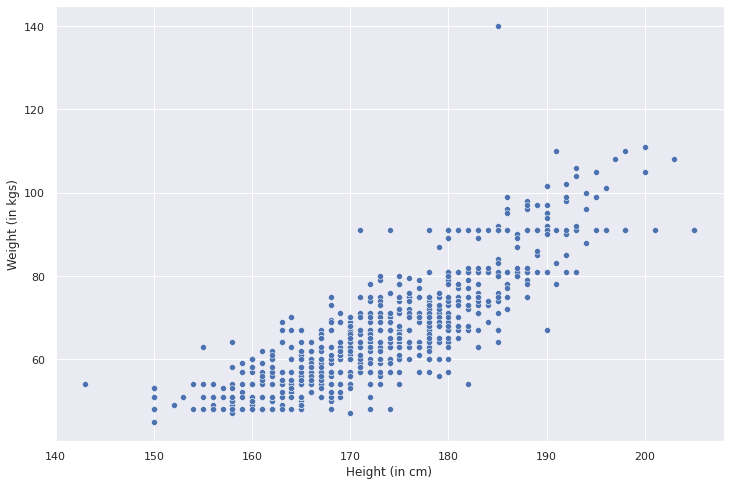

In [497]:
plt.figure(figsize=(12,8))
plt.xlabel("Height (in cm)")
plt.ylabel("Weight (in kgs)")
sns.scatterplot(x='Height',y='Weight',data = data)

**Voila! my assumption was right. There indeed seems to be a strong correlation between an Olympian's height and weight according to the scatterplot.**

**Let me just quickly calculate the correlation coefficient here to be absolutely certain...**


In [498]:
data['Height'].corr(data['Weight'])

0.8481834663065507

**The value and the visuals confirms my hypothesis. There is without an inkling of doubt a strong correlation between Height and Weight**
___

### Introductory Task 4 - Sportwise gender distribution 
**The three sports I have been assigned are Boxing, Badminton and TableTennis.**

**NOTE: The question says past 5 years, however the olympics are held only once every 4 years and it would be absurd to plot data from only one game for this, thus I have taken the question to have meant last 5 games instead**


In [499]:
new_data = data[data['Year']>=2000]

In [500]:
boxing_data = new_data[new_data['Sport']=='Boxing']
table_tennis_data = new_data[new_data['Sport']=='Table Tennis']
badminton_data = new_data[new_data['Sport']=='Badminton']

**Now that I have split the data based on the time and sport, lets move on to plotting the frequencies shall we?**

/home/swapnilsnair/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


M    210
F     23
Name: Sex, dtype: int64

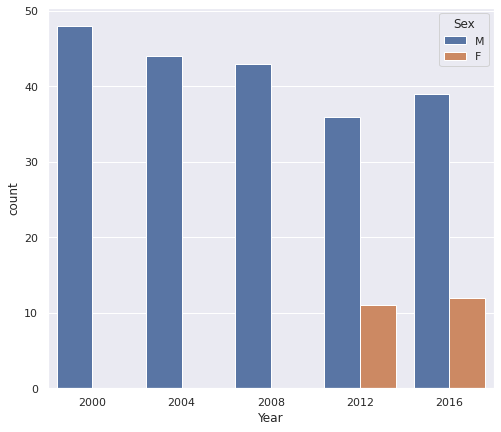

In [501]:
plt.figure(figsize=(8,7))
sns.countplot(boxing_data['Year'],hue=boxing_data.Sex)
boxing_data.Sex.value_counts()

/home/swapnilsnair/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


F    60
M    59
Name: Sex, dtype: int64

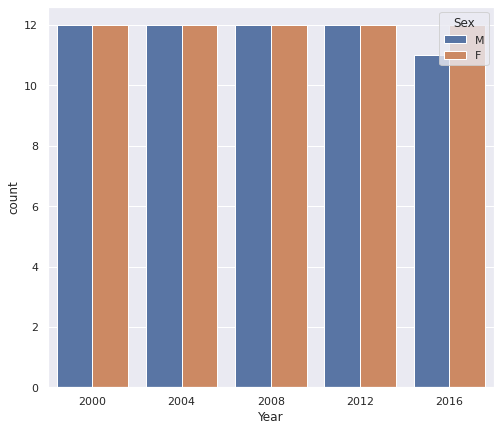

In [502]:
plt.figure(figsize=(8,7))
sns.countplot(badminton_data['Year'],hue=badminton_data.Sex)
badminton_data.Sex.value_counts()

/home/swapnilsnair/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


F    54
M    54
Name: Sex, dtype: int64

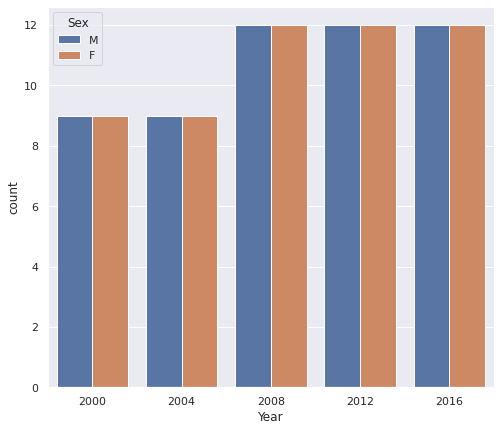

In [503]:
plt.figure(figsize=(8,7))
sns.countplot(table_tennis_data['Year'],hue=table_tennis_data.Sex)
table_tennis_data.Sex.value_counts()

**Woah, while boxing shows a clear lack of women medallists until 2012, table tennis and badminton show a striking contrast with men and women being equally represented all the way since 2000.**
*On deeper inspection however,I suspect that I got a mixed doubles data set for the latter two sports,which would explain the near perfect ratio.*
~~Moments of extreme panic here because I thought I goofed up somewhere~~

___
### Task Question 1 - Stacked plot for Medal Count
**Let me first split it sportwise.Then find the max occurring team** 

In [504]:
data = pd.read_csv('39.csv')
boxing = data[data['Sport']=='Boxing']
badminton = data[data['Sport'] == 'Badminton']
tt = data[data['Sport']=='Table Tennis']

**Of course I looked at Boxing first. Turns out the USA has made the most appearances, who would have guessed ...**

In [505]:
boxing.Team.value_counts().head(3)

United States    78
Cuba             73
Poland           41
Name: Team, dtype: int64

**Then comes the Chinese for Badminton, I'll give this one to Mainland China.**

In [506]:
badminton.Team.value_counts().head(3)

China      24
China-1    22
China-2    18
Name: Team, dtype: int64

**China absolutely dominates Table Tennis, no contest here.**

In [507]:
tt.Team.value_counts().head(5)

China          51
China-1        18
South Korea    17
Germany        16
China-2        12
Name: Team, dtype: int64

**Now to cumulate the yearwise medal tally for the countries in question using groupby**

In [552]:
china_wins = data[(data['Team'] =='China')]
china_wins = data[data['Sport']== 'Table Tennis']
#china_wins = china_wins.groupby('Year')['Medal'].count()
china_wins = china_wins.groupby(['Year','Medal']).Medal.count()
china_wins.head(10)

Year  Medal 
1988  Bronze    6
      Gold      6
      Silver    6
1992  Bronze    8
      Gold      6
      Silver    6
1996  Bronze    5
      Gold      6
      Silver    6
2000  Bronze    6
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Year,Medal'>

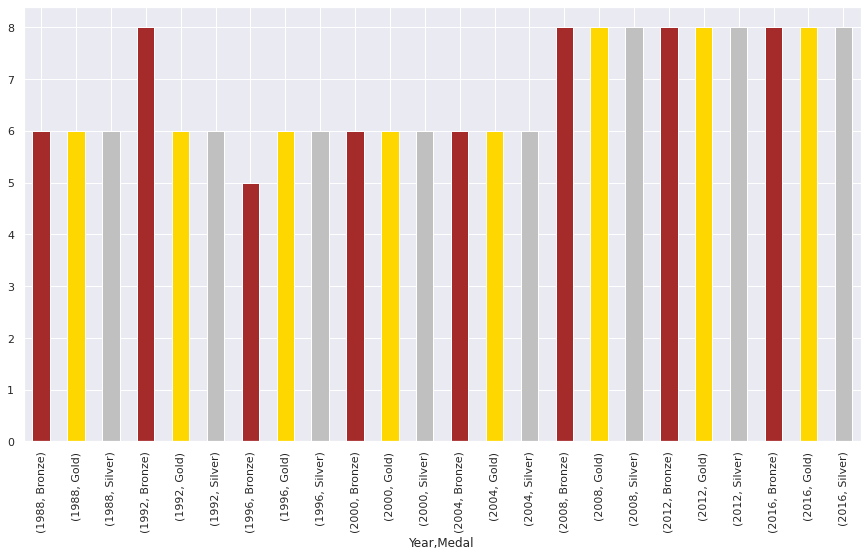

In [553]:
plt.figure(figsize=(15,8))
china_wins.plot(x='Year',kind="bar",stacked=True,color=['brown',"gold",'silver'])

**For China in Badminton**

In [509]:
chinawins = data[data['Team'] =='China']
chinawins = data[data['Sport'] =='Badminton']
chinawins = chinawins.groupby(['Year','Medal']).Medal.count()
#chinawins = chinawins.groupby('Year')['Medal'].count()
chinawins.head(10)

Year  Medal 
1992  Bronze    10
      Gold       2
      Silver     5
1996  Bronze     6
      Gold       6
      Silver     6
2000  Bronze     8
      Gold       8
      Silver     8
2004  Bronze     8
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Year,Medal'>

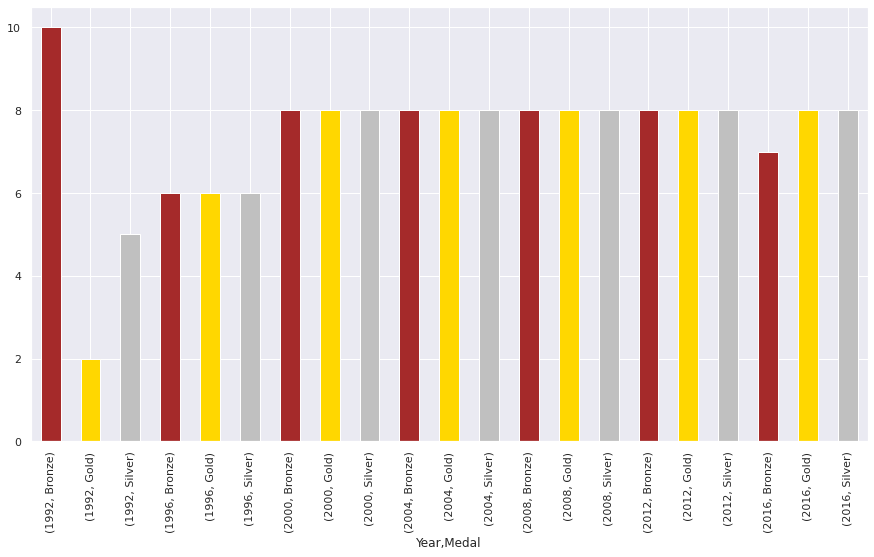

In [547]:
plt.figure(figsize=(15,8))
chinawins.plot(x='Year',kind="bar",stacked=True,color=['brown',"gold",'silver'])

**Finally The USA in Boxing**

In [545]:
uswins = data[data['Team'] =='USA']
uswins = data[data['Sport'] =='Boxing']
uswins = uswins.groupby(['Year','Medal']).Medal.count()
uswins.head(10)

Year  Medal 
1904  Gold      1
      Silver    1
1920  Gold      2
1924  Bronze    2
      Gold      3
1928  Gold      2
1932  Bronze    1
      Gold      3
1936  Gold      2
      Silver    2
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Year,Medal'>

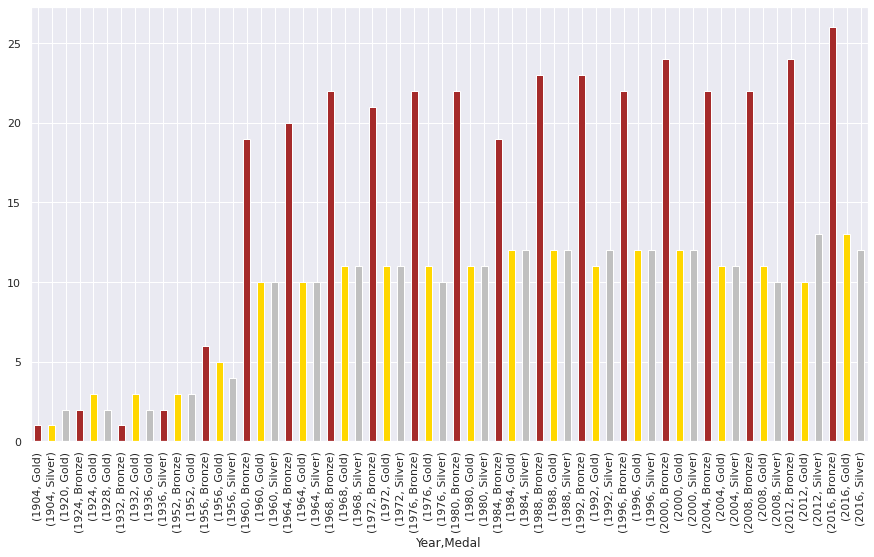

In [546]:
plt.figure(figsize=(15,8))
uswins.plot(x='Year',kind="bar",stacked=True,color=['brown',"gold",'silver'])

___
### Task Question 2 - The Most Decorated Athlete
**Alas,Swimming wasn't in the set of sports I recieved so the answer isn't Phelps. Since this is purely a winners dataset, finding the person with the most number of medals would be enough. Gold,Silver and Bronze are not distinctly valued here, its just a numerical maximum.**

In [511]:
data.Name.value_counts().head(10)

Wang Nan              5
Wang Hao              5
Zhang Jike            4
Yu Nam-Gyu            4
Dimitrij Ovtcharov    4
Liu Guoliang          4
Deng Yaping           4
Guo Yue               4
Zhang Yining          4
Li Xiaoxia            4
Name: Name, dtype: int64

**Since we have two athletes with the same number of medals, I'm going to see which one has medals of higher value. i.e, gold > silver > bronze**

In [512]:
nan = data[data['Name'] == "Wang Nan" ]
wang = data[data['Name'] == "Wang Hao" ]
print("Nan  :\n",nan.Medal.value_counts())
print("Wang: \n",wang.Medal.value_counts())


Nan  :
 Gold      4
Silver    1
Name: Medal, dtype: int64
Wang: 
 Silver    3
Gold      2
Name: Medal, dtype: int64


**And there you have it,with 4 Gold medals and 1 Silver Medal ,Wang Nan is the most successful olympian in this dataset.**